In [3]:
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4
from wd_setup import WhiteDwarf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Ye: 0.5, k: 1.36e-36 s-1, Core density: 1.958e+14 g/cc, Mass: 1.152 Msolar, Radius: 53.152 km


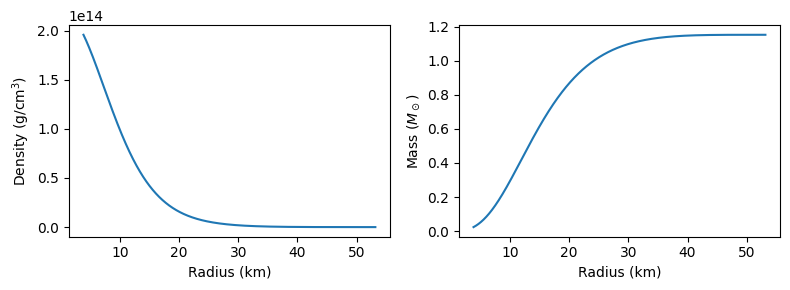

In [6]:
wd1 = WhiteDwarf(Ye=0.5, rhoc_scaled=1e8, Z=12, k=1.36e-36)
wd1.integrate()
print(repr(wd1))
wd1.plot(figsize=(8,3))

Ye: 0.5, k: 0 s-1, Core density: 1.958e+14 g/cc, Mass: 1.140 Msolar, Radius: 52.921 km


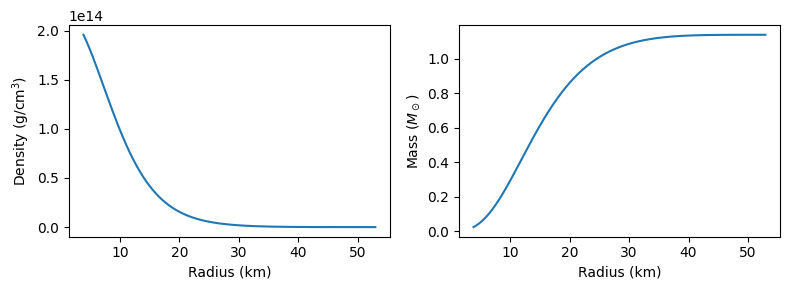

In [5]:
wd2 = WhiteDwarf(Ye=0.5, rhoc_scaled=1e8, Z=12, k=0)
wd2.integrate()
print(repr(wd2))
wd2.plot(figsize=(8,3))

In [8]:
from constants import *
from decay import decay
def order_estimate():
    rhoc_scaled = 1e12
    wd1 = WhiteDwarf(Ye=1, rhoc_scaled=rhoc_scaled, k=1.36e-42, Z=12)
    rb = 1e-6
    m = rhoc_scaled * (rb ** 3)/ 3
    P = wd1.get_pressure(wd1._x(rhoc_scaled))

    print(f"{wd1.TOV(rb, rhoc_scaled, P, m):.3e}, {wd1.get_proton_pressure(rb, m, rhoc_scaled):.3e}")

order_estimate()

-4.004e+18, -2.413e+10


In [212]:
R = []
M = []
rhoc_scaled = np.logspace(-1, 8, 10)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=0.5, rhoc_scaled=rhoc, Z=12, k=0)
    wd1.integrate()

    R.append(wd1.rbar2r(wd1.radius))
    M.append(wd1.mbar2m(wd1.mass))

newR = np.array(R)
newM = np.array(M)

100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


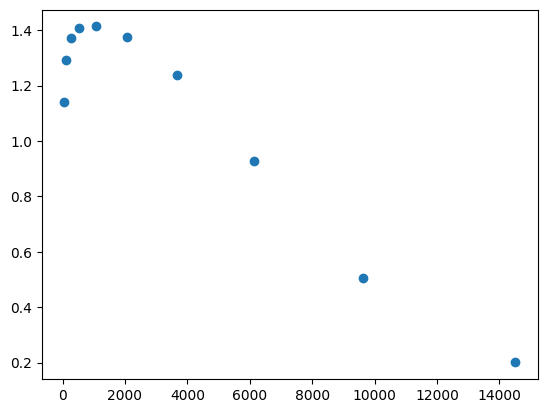

In [213]:
#plt.scatter(oldR/1e5, oldM/1.989e33, s=0.4)
plt.scatter(newR, newM)

In [7]:
repr(wd1)

'Ye: 0.5, k: 1.36e-36 s-1, Core density: 1.958e+14 g/cc, Mass: 1.152 Msolar, Radius: 53.152 km'